<a href="https://colab.research.google.com/github/dlunaaa/ADDA2-Lab2/blob/main/Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/dlunaaa/Skin-Cancer-Project.git

Cloning into 'Skin-Cancer-Project'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [27]:
from google.colab import userdata
token = userdata.get('token')
repo_url = f"https://{token}@github.com/NHV4546/Skin-Cancer-Project.git"
%cd /content/Skin-Cancer-Project
!git config --global user.name "NHV4546"
!git config --global user.email "dinasamat0110@gmail.com"
!git remote set-url origin $repo_url

/content/Skin-Cancer-Project
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
Everything up-to-date


In [30]:
import kagglehub
# Downloading dataset HAM10000 from kagle
path = kagglehub.dataset_download("kmader/skin-cancer-mnist-ham10000")



100%|██████████| 5.20G/5.20G [00:56<00:00, 99.4MB/s]

Extracting files...


     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp


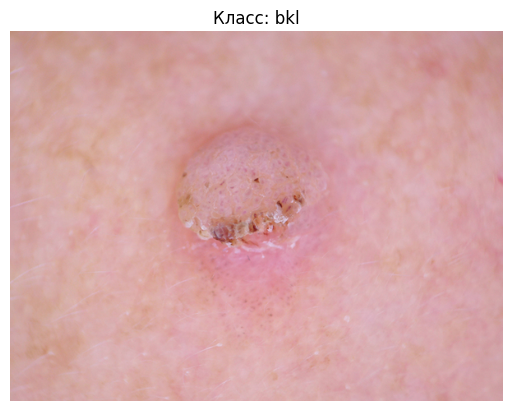

In [31]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt

# Load metadata CSV file
df = pd.read_csv(os.path.join(path, 'HAM10000_metadata.csv'))

# Display the first row of the metadata
print(df.head(1))

# Get the image filename from the 7th row (index 6)
image_name = df.iloc[6]['image_id'] + '.jpg'

# Construct paths for the image in two possible subfolders
image_path_1 = os.path.join(path, 'HAM10000_images_part_1', image_name)
image_path_2 = os.path.join(path, 'HAM10000_images_part_2', image_name)

# Check which subfolder contains the image file
if os.path.exists(image_path_1):
    final_image_path = image_path_1
elif os.path.exists(image_path_2):
    final_image_path = image_path_2
else:
    raise FileNotFoundError("Image file not found in any folder")

# Load and display the image
img = Image.open(final_image_path)
plt.imshow(img)
plt.title(f"Class: {df.iloc[0]['dx']}")
plt.axis('off')
plt.show()
